[View in Colaboratory](https://colab.research.google.com/github/chnsh/deep-learning-tutorials/blob/master/btc_price_prediction.ipynb)

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [0]:
data = pd.read_csv('https://api.blockchain.info/charts/market-price?format=csv', header=None)

In [0]:
data.drop(0, axis=1, inplace=True)

In [82]:
data.shape

(365, 1)

In [0]:
train = data[:data.shape[0]-30]
test = data[data.shape[0]-30:]

In [89]:
print(train.shape)
print(test.shape)

(335, 1)
(30, 1)


In [86]:
train.tail()

,1
330,8727.651667
331,8652.038333
332,8511.458000
333,8340.703333
334,8106.118333


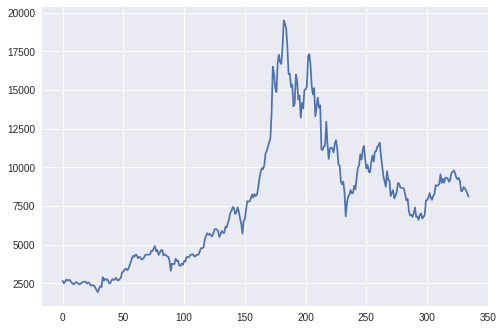

In [102]:
plt.plot(train)

In [0]:
train_scaler = MinMaxScaler()
train_transformed = train_scaler.fit_transform(train)
X_train = train_transformed[:train_transformed.shape[0]-1]
y_train = train_transformed[1:train_transformed.shape[0]]

In [104]:
print(X_train.shape)
print(y_train.shape)

(334, 1)
(334, 1)


In [0]:
X_train = X_train.reshape((-1,1, 1))

In [108]:
X_train.shape

(334, 1, 1)

In [133]:
num_units = 5
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100


model = Sequential()
model.add(LSTM(units=num_units, activation=activation_function, input_shape=(1, 1)))
model.add(Dense(units=1))

model.compile(optimizer=optimizer, loss=loss_function)


model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, verbose=0)

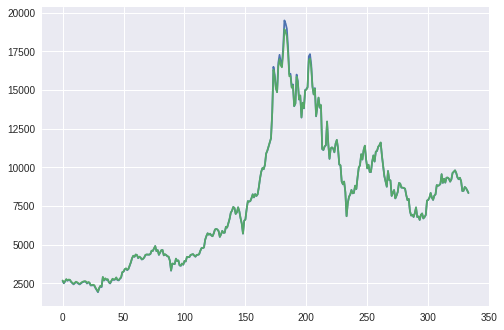

In [122]:
plt.plot(train_scaler.inverse_transform(X_train.reshape((-1, 1))))
plt.plot(train_scaler.inverse_transform(model.predict(X_train)))

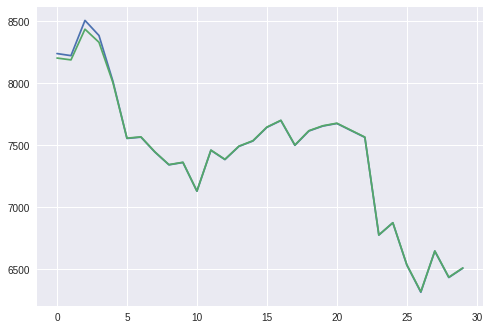

In [123]:
test_transformer = MinMaxScaler()
test_transformed = test_transformer.fit_transform(test)
plt.plot(test_transformer.inverse_transform(test_transformed))
plt.plot(test_transformer.inverse_transform(model.predict(test_transformed.reshape(-1, 1, 1))))